In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
!pip install pyts
from pyts.image import GramianAngularField

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.8 MB/s eta 0:00:00


In [ ]:
import scipy.stats as stats

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 1a

In [ ]:
# Download stock price of JPMorgan, from 2017-01-01 to 2024-01-01
start = "2017-01-01"
end = "2024-01-01"
df = yf.download("JPM", start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df1 = df["Adj Close"]
df1.index = df1.index.date
df1.index = pd.to_datetime(df1.index, format="%Y-%m-%d")


In [ ]:
df1.head()

Ticker            JPM
2017-01-03  69.970299
2017-01-04  70.099365
2017-01-05  69.454109
2017-01-06  69.462173
2017-01-09  69.510551

In [ ]:
df1.describe()

Ticker          JPM
count   1760.000000
mean     108.466272
std       25.615222
min       66.640770
25%       88.317184
50%      101.835449
75%      133.327747
max      166.328217

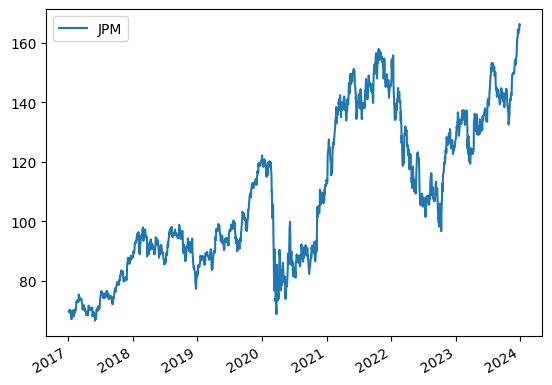

In [ ]:
df1.plot()
plt.legend();

In [ ]:
#Augmented Dickey Fuller test to check for stationarity
adf_df1 = adfuller(df1["JPM"])
print(f"ADF statistic: {adf_df1[0]:.3f}")
print(f"p-value : {adf_df1[1]:.3f}")

ADF statistic: -1.049
p-value : 0.735


## 1b

In [ ]:
# Fetch historical data using yfinance
symbol = "JPM"  # Replace with any desired symbol
data = yf.download(symbol, start="2017-01-01", end="2024-01-01")  # Adjust dates as needed
prices = data['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Transform the series (log differences)
log_prices = np.log(prices)
log_diff = log_prices.diff().dropna()

# First Difference
first_diff = prices.diff().dropna()  # First difference: difference between consecutive values

# Second Difference
second_diff = first_diff.diff().dropna()  # Second difference: difference between consecutive first differences

# Third Difference
third_diff = second_diff.diff().dropna()  # Third difference: difference between consecutive second differences

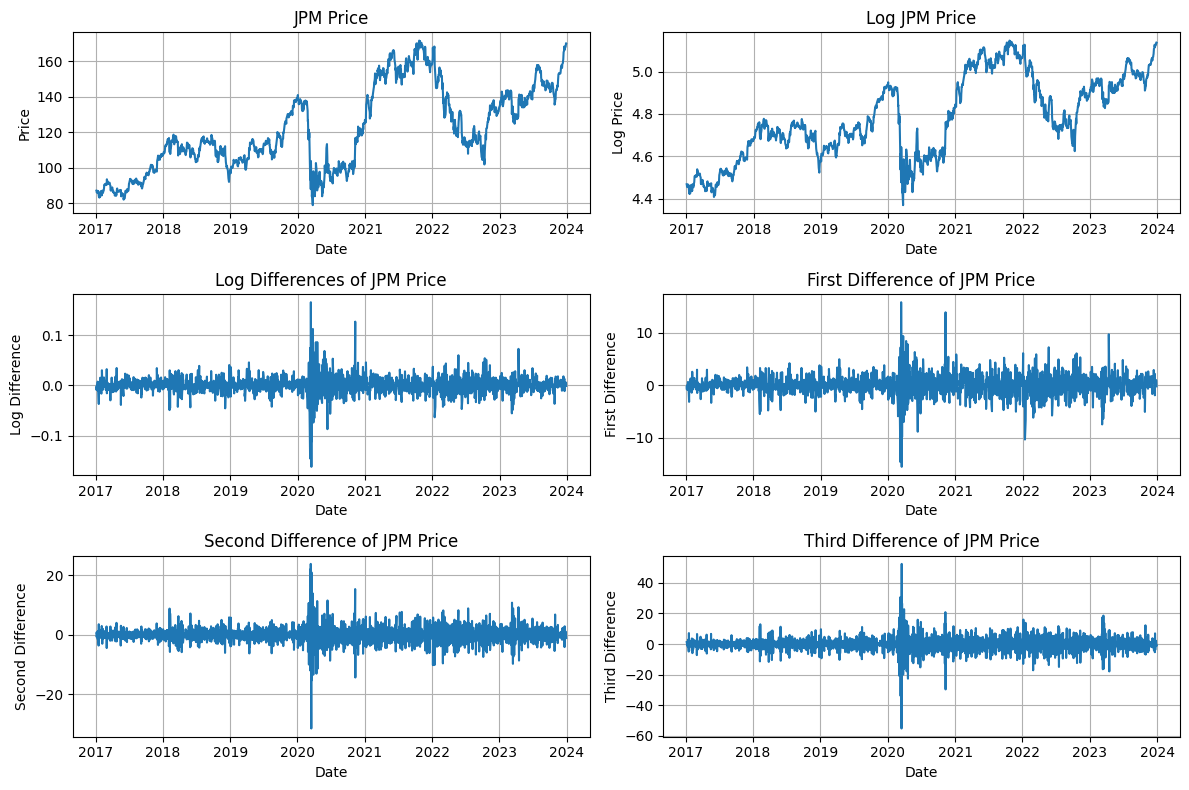

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))


# Plot raw prices
ax[0,0].plot(prices)
ax[0,0].set_title('JPM Price')
ax[0,0].grid(True)
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Price')

# Plot log prices
ax[0,1].plot(log_prices)
ax[0,1].set_title('Log JPM Price')
ax[0,1].grid(True)
ax[0,1].set_xlabel('Date')
ax[0,1].set_ylabel('Log Price')

# Plot log differences
ax[1,0].plot(log_diff)
ax[1,0].set_title('Log Differences of JPM Price')
ax[1,0].grid(True)
ax[1,0].set_xlabel('Date')
ax[1,0].set_ylabel('Log Difference')

# Plot first differences
ax[1,1].plot(first_diff)
ax[1,1].set_title('First Difference of JPM Price')
ax[1,1].grid(True)
ax[1,1].set_xlabel('Date')
ax[1,1].set_ylabel('First Difference')

# Plot second differences
ax[2,0].plot(second_diff)
ax[2,0].set_title('Second Difference of JPM Price')
ax[2,0].grid(True)
ax[2,0].set_xlabel('Date')
ax[2,0].set_ylabel('Second Difference')

# Plot third differences
ax[2,1].plot(third_diff)
ax[2,1].set_title('Third Difference of JPM Price')
ax[2,1].grid(True)
ax[2,1].set_xlabel('Date')
ax[2,1].set_ylabel('Third Difference')

plt.tight_layout()
plt.show()


In [ ]:


# Get the summary statistics
prices_summary = prices.describe()
log_prices_summary = log_prices.describe()
log_diff_summary = log_diff.describe()
first_diff_summary = first_diff.describe()
second_diff_summary = second_diff.describe()
third_diff_summary = third_diff.describe()

# Combine all summaries into a single DataFrame
summary_table = pd.concat(
    [prices_summary,log_prices_summary,log_diff_summary,first_diff_summary, second_diff_summary, third_diff_summary],
    axis=1,
    keys=['prices','log_prices','log_diff','First Difference', 'Second Difference', 'Third Difference']
)

# Display the summary table
summary_table.round(4)


prices log_prices   log_diff First Difference Second Difference  \
Ticker        JPM        JPM        JPM              JPM               JPM   
count   1760.0000  1760.0000  1759.0000        1759.0000         1758.0000   
mean     121.5342     4.7819     0.0004           0.0471            0.0001   
std       23.2942     0.1912     0.0182           2.0635            3.0131   
min       79.0300     4.3698    -0.1621         -15.5500          -31.4100   
25%      103.4800     4.6394    -0.0078          -0.9000           -1.4375   
50%      115.5350     4.7496     0.0003           0.0300            0.0100   
75%      139.8625     4.9407     0.0089           1.0550            1.3975   
max      171.7800     5.1462     0.1656          15.8600           23.7700   

       Third Difference  
Ticker              JPM  
count         1757.0000  
mean            -0.0004  
std              5.3387  
min            -55.1800  
25%             -2.4900  
50%              0.0600  
75%              2.4800  
max             52.3600

In [ ]:


# Function to perform ADF test and print results
def adf_test(series, series_name="Series"):
    print(f"\nADF Test Results for {series_name}:")
    adf_result = adfuller(series)
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print(f"Critical Values: {adf_result[4]}")
    if adf_result[1] < 0.05:
        print("Reject the null hypothesis: The series is stationary.")
    else:
        print("Fail to reject the null hypothesis: The series is non-stationary.")

# Perform ADF test on the original series (prices)
adf_test(prices, "Original Series")

# Perform ADF test on the Log series (prices)
adf_test(log_prices, "Log Series")

# Perform ADF test on the Log Differences series (prices)
adf_test(log_diff, "Log Differences")

# Perform ADF test on the first differenced series
adf_test(first_diff, "First Differenced Series")

# Perform ADF test on the second differenced series
adf_test(second_diff, "Second Differenced Series")

# Perform ADF test on the third differenced series
adf_test(third_diff, "Third Differenced Series")

# # Autocorrelation analysis
# plot_acf(log_diff, lags=20, title="Autocorrelation")
# plot_pacf(log_diff, lags=20, title="Partial Autocorrelation")
# plt.show()



ADF Test Results for Original Series:
ADF Statistic: -1.5683572249511375
p-value: 0.49946641924861185
Critical Values: {'1%': -3.434100824760071, '5%': -2.863196780129223, '10%': -2.5676520210882936}
Fail to reject the null hypothesis: The series is non-stationary.

ADF Test Results for Log Series:
ADF Statistic: -1.7262835362049174
p-value: 0.417623809139228
Critical Values: {'1%': -3.4341137777946718, '5%': -2.8632024980220288, '10%': -2.56765506572863}
Fail to reject the null hypothesis: The series is non-stationary.

ADF Test Results for Log Differences:
ADF Statistic: -10.379440872906288
p-value: 2.1582514396601458e-18
Critical Values: {'1%': -3.4341137777946718, '5%': -2.8632024980220288, '10%': -2.56765506572863}
Reject the null hypothesis: The series is stationary.

ADF Test Results for First Differenced Series:
ADF Statistic: -12.192700469045652
p-value: 1.2749949283889504e-22
Critical Values: {'1%': -3.434100824760071, '5%': -2.863196780129223, '10%': -2.5676520210882936}
Re

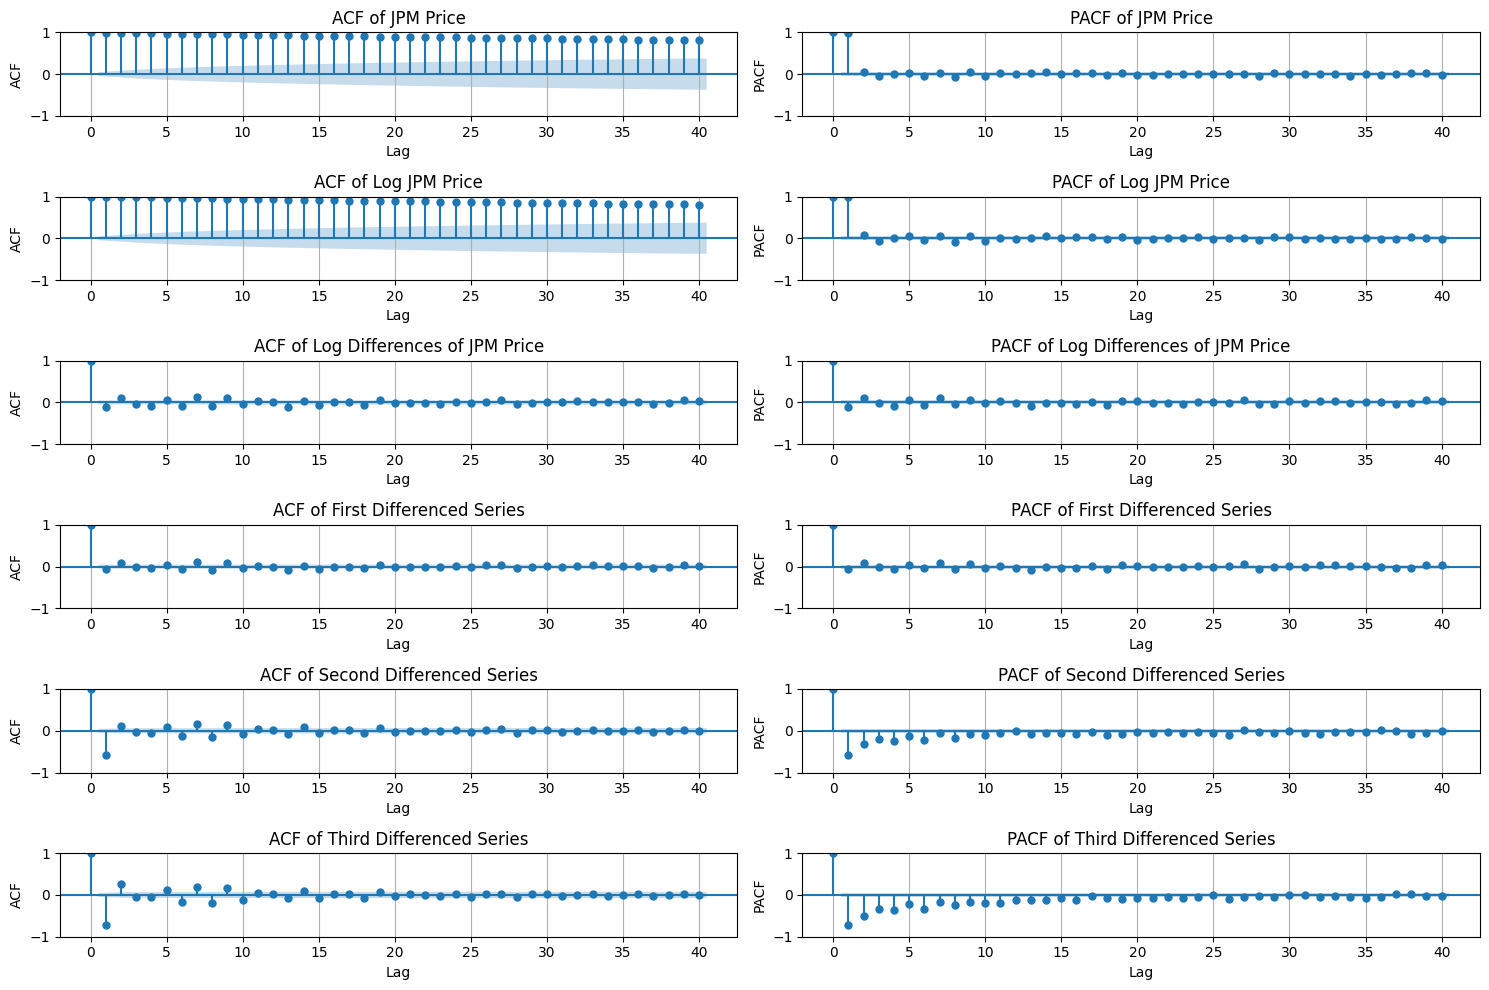

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15, 10))
# Plot ACF and PACF for prices
plot_acf(prices, lags=40, ax=ax[0, 0])
ax[0,0].set_title('ACF of JPM Price')
ax[0,0].grid(True)
ax[0,0].set_xlabel('Lag')
ax[0,0].set_ylabel('ACF')
plot_pacf(prices, lags=40, ax=ax[0, 1])
ax[0,1].set_title('PACF of JPM Price')
ax[0,1].grid(True)
ax[0,1].set_xlabel('Lag')
ax[0,1].set_ylabel('PACF')

# Plot ACF and PACF for Log price
plot_acf(log_prices, lags=40, ax=ax[1, 0])
ax[1,0].set_title('ACF of Log JPM Price')
ax[1,0].grid(True)
ax[1,0].set_xlabel('Lag')
ax[1,0].set_ylabel('ACF')
plot_pacf(log_prices, lags=40, ax=ax[1, 1])
ax[1,1].set_title('PACF of Log JPM Price')
ax[1,1].grid(True)
ax[1,1].set_xlabel('Lag')
ax[1,1].set_ylabel('PACF')

# Plot ACF and PACF for Log diff
plot_acf(log_diff, lags=40, ax=ax[2, 0])
ax[2,0].set_title('ACF of Log Differences of JPM Price')
ax[2,0].grid(True)
ax[2,0].set_xlabel('Lag')
ax[2,0].set_ylabel('ACF')
plot_pacf(log_diff, lags=40, ax=ax[2, 1])
ax[2,1].set_title('PACF of Log Differences of JPM Price')
ax[2,1].grid(True)
ax[2,1].set_xlabel('Lag')
ax[2,1].set_ylabel('PACF')

# Plot ACF and PACF for First Differenced Series
plot_acf(first_diff, lags=40, ax=ax[3, 0])
ax[3,0].set_title('ACF of First Differenced Series')
ax[3,0].grid(True)
ax[3,0].set_xlabel('Lag')
ax[3,0].set_ylabel('ACF')
plot_pacf(first_diff, lags=40, ax=ax[3, 1])
ax[3,1].set_title('PACF of First Differenced Series')
ax[3,1].grid(True)
ax[3,1].set_xlabel('Lag')
ax[3,1].set_ylabel('PACF')


# Plot ACF and PACF for Second Differenced Series
plot_acf(second_diff, lags=40, ax=ax[4, 0])
ax[4,0].set_title('ACF of Second Differenced Series')
ax[4,0].grid(True)
ax[4,0].set_xlabel('Lag')
ax[4,0].set_ylabel('ACF')
plot_pacf(second_diff, lags=40, ax=ax[4, 1])
ax[4,1].set_title('PACF of Second Differenced Series')
ax[4,1].grid(True)
ax[4,1].set_xlabel('Lag')
ax[4,1].set_ylabel('PACF')

# Plot ACF and PACF for third Differenced Series
plot_acf(third_diff, lags=40, ax=ax[5, 0])
ax[5,0].set_title('ACF of Third Differenced Series')
ax[5,0].grid(True)
ax[5,0].set_xlabel('Lag')
ax[5,0].set_ylabel('ACF')
plot_pacf(third_diff, lags=40, ax=ax[5, 1])
ax[5,1].set_title('PACF of Third Differenced Series')
ax[5,1].grid(True)
ax[5,1].set_xlabel('Lag')
ax[5,1].set_ylabel('PACF')

plt.tight_layout()
plt.show()



## 1c

In [ ]:
start = "2017-01-01"
end = "2024-01-01"
data = yf.download("JPM", start, end)
series = data["Adj Close"]
np.random.seed(42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
def getWeights(d, lags):
    # Generate weights for fractional differencing
    w = [1]
    for k in range(1, lags):
        w.append(-w[-1] * ((d - k + 1)) / k)
    w = np.array(w).reshape(-1, 1)
    return w

def ts_differencing(series, order, lag_cutoff):
    # Apply fractional differencing
    weights = getWeights(order, lag_cutoff)
    res = 0
    for k in range(lag_cutoff):
        res += weights[k] * series.shift(k).fillna(0)
    return res[lag_cutoff:]  # Drop initial NaNs

# Apply fractional differencing
diff_order = 0.5  # Fractional differencing order
lag_cutoff = 30   # Number of lag terms to include
diff_series = ts_differencing(series, diff_order, lag_cutoff)


Summary statistics of the differenced series:
Ticker          JPM
count   1730.000000
mean      11.547772
std        3.511371
min       -7.523696
25%        9.008315
50%       11.055030
75%       14.136181
max       22.635782

Skewness: Ticker
JPM    0.070555
dtype: float64


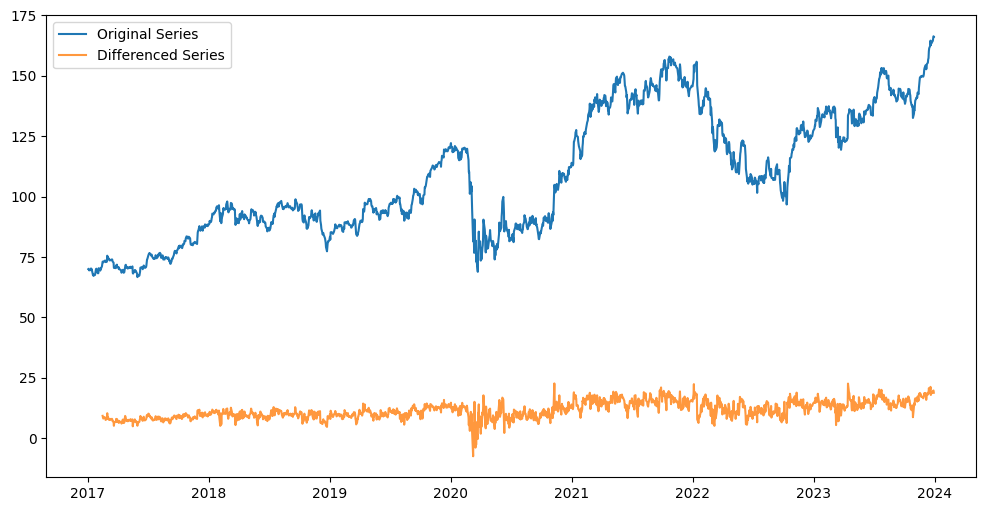

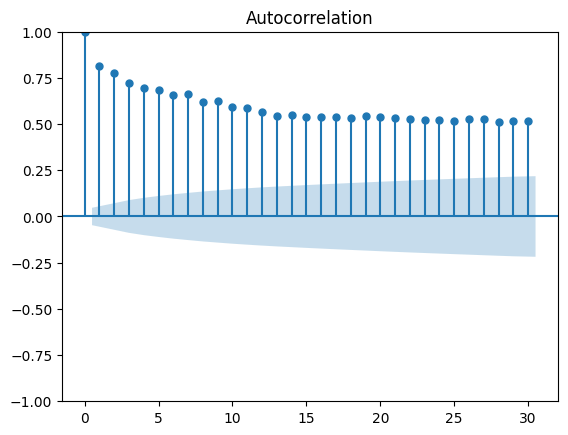

ADF Statistic: -2.9136380532695325
p-value: 0.04378490747553775


In [ ]:
# Summary statistics
print("Summary statistics of the differenced series:")
print(diff_series.describe())

skewness = diff_series.skew()
print("\nSkewness:", skewness)

# Plotting the original vs differenced series
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Series')
plt.plot(diff_series, label='Differenced Series', alpha=0.8)
# plt.title('Original vs Fractionally Differenced Series')
plt.legend()
plt.show()

# Autocorrelation to evaluate persistence
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff_series.dropna(), lags=30)
plt.show()

# Stationarity test (ADF test)
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(diff_series.dropna())
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")


Characterization of Properties

*   Visual Inspection. The line graph comparing the original vs fractionally differenced series shows that differenced series exhibits a mean-reverting behavior which indicates stationarity.
*   ACF plot also shows that as the lag increases, autocorrelation coefficients weaken. This implies correlation weakens indicates stationary tendency of the differenced series.
*   ADF test (-2.9136) further confirms stationary with p-value = 0.04.
*   The Summary Statistics of the fractionally differenced series shows a mean of 11.55 with sd = 3.51, this indicates moderate variance with a skewness (0.07) that tends towards symmetry in the data distribution.

## 2a

In [ ]:
df2 = df.copy()
df2["Ret"] = df2["Adj Close"].pct_change()
df2.index = df2.index.date
df2.index = pd.to_datetime(df2.index, format="%Y-%m-%d")
df2 = df2.dropna()
df2.reset_index(inplace=True)
df2.rename(columns={'index': 'Date'}, inplace=True)
df2.head()

<ipython-input-73-a3aa6277a071>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'index': 'Date'}, inplace=True)


Price        Date  Adj Close      Close       High        Low       Open  \
Ticker                   JPM        JPM        JPM        JPM        JPM   
0      2017-01-04  70.099365  86.910004  87.180000  86.400002  86.959999   
1      2017-01-05  69.454109  86.110001  87.110001  85.260002  86.809998   
2      2017-01-06  69.462173  86.120003  86.620003  85.940002  86.389999   
3      2017-01-09  69.510551  86.180000  86.769997  85.519997  85.730003   
4      2017-01-10  69.712204  86.430000  86.900002  85.720001  86.070000   

Price     Volume       Ret  
Ticker       JPM            
0       15266600  0.001845  
1       14300800 -0.009205  
2       12893300  0.000116  
3       12806600  0.000696  
4       13989000  0.002901

In [ ]:
df2.shape

(1759, 8)

In [ ]:
#Generate the differents inputs to be used for the MLP model
df2["Ret25"] = df2["Ret"].rolling(25).apply(lambda x: np.prod(1 + x) - 1)
df2["Ret60"] = df2["Ret"].rolling(60).apply(lambda x: np.prod(1 + x) - 1)
df2["Ret90"] = df2["Ret"].rolling(90).apply(lambda x: np.prod(1 + x) - 1)
df2["Ret120"] = df2["Ret"].rolling(120).apply(lambda x: np.prod(1 + x) - 1)
df2["Ret240"] = df2["Ret"].rolling(240).apply(lambda x: np.prod(1 + x) - 1)
df2.drop(columns=["Adj Close", "Close","High","Low","Open","Volume"], inplace=True)
df2.tail()

<ipython-input-75-58d79e78d35a>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df2.drop(columns=["Adj Close", "Close","High","Low","Open","Volume"], inplace=True)


Price        Date       Ret     Ret25     Ret60     Ret90    Ret120    Ret240
Ticker                                                                       
1754   2023-12-22 -0.000597  0.105315  0.142592  0.122812  0.165896  0.234674
1755   2023-12-26  0.005914  0.101885  0.169718  0.141307  0.184502  0.232815
1756   2023-12-27  0.005998  0.105095  0.186965  0.145532  0.182278  0.241454
1757   2023-12-28  0.005313  0.113290  0.202135  0.147690  0.181927  0.217331
1758   2023-12-29 -0.001175  0.109372  0.195362  0.170619  0.162360  0.234986

In [ ]:
df2 = df2.dropna()
df2.head()

Price        Date       Ret     Ret25     Ret60     Ret90    Ret120    Ret240
Ticker                                                                       
239    2017-12-14 -0.008056  0.071897  0.112810  0.123739  0.213330  0.227194
240    2017-12-15  0.014141  0.087166  0.123439  0.141457  0.219167  0.242256
241    2017-12-18  0.007726  0.096913  0.134506  0.166995  0.204375  0.263483
242    2017-12-19 -0.004207  0.088391  0.138255  0.171872  0.181809  0.258021
243    2017-12-20 -0.003474  0.091189  0.139386  0.154292  0.174482  0.252779

In [ ]:
df2.shape

(1520, 7)

In [ ]:
#Use 60 days ahead as output, for classification problem prediction
# 1 if output is positive, 0 if negative
df2["Ret60_Forward"] = df2["Ret60"].shift(-60)
df2["Output"] = df2["Ret60_Forward"] > 0
df2["Output"] = df2["Output"].astype(int)
del df2["Ret60_Forward"]
df2 = df2.dropna()
df2.tail()

Price        Date       Ret     Ret25     Ret60     Ret90    Ret120    Ret240  \
Ticker                                                                          
1754   2023-12-22 -0.000597  0.105315  0.142592  0.122812  0.165896  0.234674   
1755   2023-12-26  0.005914  0.101885  0.169718  0.141307  0.184502  0.232815   
1756   2023-12-27  0.005998  0.105095  0.186965  0.145532  0.182278  0.241454   
1757   2023-12-28  0.005313  0.113290  0.202135  0.147690  0.181927  0.217331   
1758   2023-12-29 -0.001175  0.109372  0.195362  0.170619  0.162360  0.234986   

Price  Output  
Ticker         
1754        0  
1755        0  
1756        0  
1757        0  
1758        0

In [ ]:
# Train-test sampling, 80% train, 20% test

ts = int(0.2 * len(df2))
split_time = len(df2) - ts
test_time = df2.iloc[split_time: , 0:1].values
Ret_vector = df2.iloc[split_time:, 1:2].values

In [ ]:
X, y = df2.iloc[:, 2:-1], df2.iloc[:, -1]
X = X.astype("float32")
y = y.astype("int")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=ts, shuffle=False
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1216, 5) (304, 5) (1216,) (304,)


In [ ]:
#Model training. 3 hidden layers chosen, each with 25, 15 and 10 nodes. Dropout rate of 20% used.
# Activation function used for hidden layers is ReLu. For output layer, sigmoid function used.
tf.keras.backend.clear_session()
tf.random.set_seed(
    1234
)

act_fun = "relu"
hp_units = 25
hp_units_2 = 15
hp_units_3 = 10
n_dropout = 0.2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=hp_units, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_2, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_3, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

hp_lr = 1e-5  # Learning rate

adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)  # Adam optimizer

model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
#Introduce early stopping method

es = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    patience=20,
    restore_best_weights=True,
)

In [ ]:
#Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    verbose=2,
    callbacks=[es],

)

Epoch 1/500
31/31 - 9s - 292ms/step - accuracy: 0.3611 - loss: 0.7112 - val_accuracy: 0.6885 - val_loss: 0.6895
Epoch 2/500
31/31 - 0s - 15ms/step - accuracy: 0.3488 - loss: 0.7124 - val_accuracy: 0.6885 - val_loss: 0.6897
Epoch 3/500
31/31 - 1s - 17ms/step - accuracy: 0.3570 - loss: 0.7126 - val_accuracy: 0.6885 - val_loss: 0.6900
Epoch 4/500
31/31 - 1s - 27ms/step - accuracy: 0.3498 - loss: 0.7100 - val_accuracy: 0.6844 - val_loss: 0.6902
Epoch 5/500
31/31 - 1s - 35ms/step - accuracy: 0.3611 - loss: 0.7090 - val_accuracy: 0.6803 - val_loss: 0.6905
Epoch 6/500
31/31 - 1s - 19ms/step - accuracy: 0.3611 - loss: 0.7092 - val_accuracy: 0.6803 - val_loss: 0.6907
Epoch 7/500
31/31 - 1s - 18ms/step - accuracy: 0.3560 - loss: 0.7099 - val_accuracy: 0.6803 - val_loss: 0.6910
Epoch 8/500
31/31 - 1s - 27ms/step - accuracy: 0.3951 - loss: 0.7084 - val_accuracy: 0.6762 - val_loss: 0.6913
Epoch 9/500
31/31 - 1s - 43ms/step - accuracy: 0.3642 - loss: 0.7073 - val_accuracy: 0.6721 - val_loss: 0.6916


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,135 (8.34 KB)

 Trainable params: 711 (2.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,424 (5.57 KB)

In [ ]:
y_prob = model.predict(X_test)
y_pred = np.where(y_prob > 0.50, 1, 0)

acc = model.evaluate(X_test, y_test)
print("Model accuracy in test: ", acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3383 - loss: 0.7031      
Model accuracy in test:  [0.6939225196838379, 0.44736841320991516]


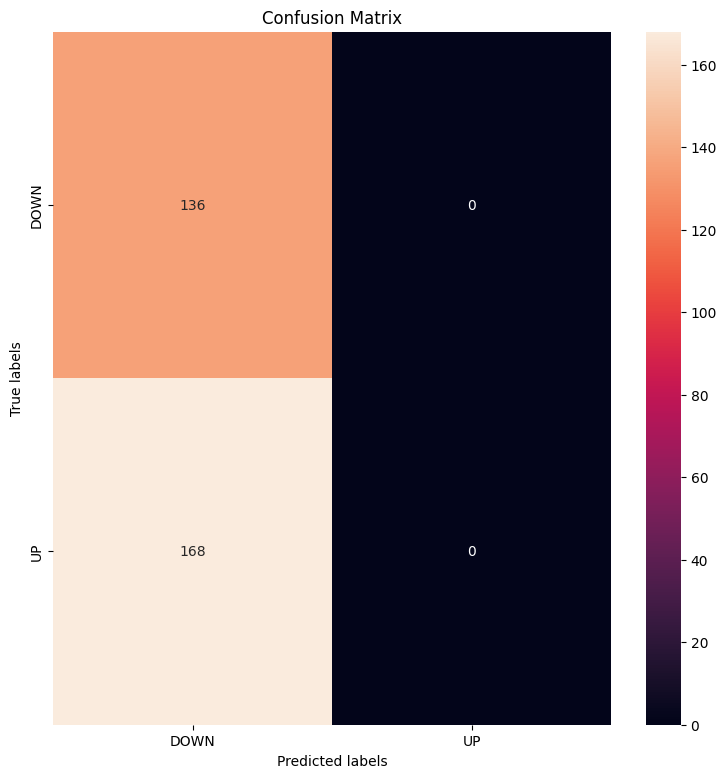

In [ ]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 9))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", ax=ax)
# annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["DOWN", "UP"])
ax.yaxis.set_ticklabels(["DOWN", "UP"]);

## 2b

In [ ]:
log_diff_no_outliers = log_diff.copy()

In [ ]:
log_diff_no_outliers.describe()

Ticker          JPM
count   1759.000000
mean       0.000380
std        0.018195
min       -0.162106
25%       -0.007768
50%        0.000262
75%        0.008879
max        0.165620

In [ ]:

# Create a new DataFrame for transformed data (log_diff_no_outliers and features)
log_diff_data = pd.DataFrame({'log_diff': log_diff_no_outliers['JPM']})

# Step 2: Add features like moving averages, EMAs, and volatility on log_diff
log_diff_data['7_day_MA'] = log_diff_data['log_diff'].rolling(window=7).mean()
log_diff_data['14_day_MA'] = log_diff_data['log_diff'].rolling(window=14).mean()
log_diff_data['30_day_MA'] = log_diff_data['log_diff'].rolling(window=30).mean()
log_diff_data['60_day_MA'] = log_diff_data['log_diff'].rolling(window=60).mean()
log_diff_data['90_day_MA'] = log_diff_data['log_diff'].rolling(window=90).mean()

# Calculate Exponential Moving Averages (EMA)
log_diff_data['7_day_EMA'] = log_diff_data['log_diff'].ewm(span=7, adjust=False).mean()
log_diff_data['14_day_EMA'] = log_diff_data['log_diff'].ewm(span=14, adjust=False).mean()
log_diff_data['30_day_EMA'] = log_diff_data['log_diff'].ewm(span=30, adjust=False).mean()
log_diff_data['60_day_EMA'] = log_diff_data['log_diff'].ewm(span=60, adjust=False).mean()
log_diff_data['90_day_EMA'] = log_diff_data['log_diff'].ewm(span=90, adjust=False).mean()

# Calculate rolling standard deviation (volatility)
log_diff_data['7_day_volatility'] = log_diff_data['log_diff'].rolling(window=7).std()
log_diff_data['14_day_volatility'] = log_diff_data['log_diff'].rolling(window=14).std()
log_diff_data['30_day_volatility'] = log_diff_data['log_diff'].rolling(window=30).std()
log_diff_data['60_day_volatility'] = log_diff_data['log_diff'].rolling(window=60).std()
log_diff_data['90_day_volatility'] = log_diff_data['log_diff'].rolling(window=90).std()

# Remove rows with NaN values (due to moving average calculations)
log_diff_data = log_diff_data.dropna()

# Generate lagged values for the log differences
n_lag = [5,30,60,90]
for lag in n_lag:
    log_diff_data[f'lag_{lag}'] = log_diff_data['log_diff'].shift(lag)

# Drop rows with NaN values caused by lagging
log_diff_data = log_diff_data.dropna()

# Step 3: Define the features and target
X = log_diff_data[['7_day_MA', '14_day_MA', '30_day_MA', '60_day_MA', '90_day_MA',
                   '7_day_EMA', '14_day_EMA', '30_day_EMA', '60_day_EMA', '90_day_EMA',
                   '7_day_volatility', '14_day_volatility', '30_day_volatility',
                   '60_day_volatility', '90_day_volatility'] + [f'lag_{lag}' for lag in n_lag]]

y = log_diff_data['log_diff']  # Target is the log difference of the Close prices



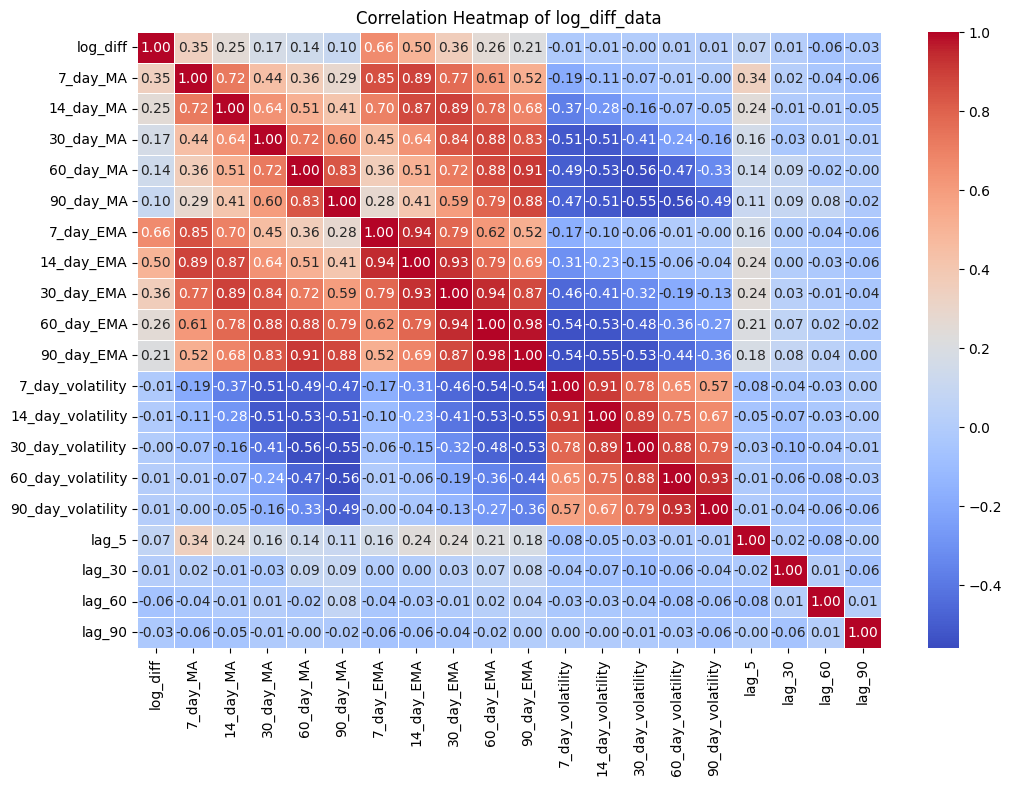

In [ ]:
# Calculate the correlation matrix
correlation_matrix = log_diff_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of log_diff_data')
plt.show()


In [ ]:
X = log_diff_data[['7_day_EMA','90_day_MA','30_day_volatility']+ [f'lag_{lag}' for lag in n_lag]]
y = y = log_diff_data['log_diff']  # Target is the log difference of the Close prices

In [ ]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Hyperparameters for the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), activation='logistic',
                   alpha=0.01, learning_rate='constant',
                   learning_rate_init=0.001, solver='adam',
                   max_iter=1000, random_state=42, verbose=True)

# Train the MLP model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Step 5: Calculate and print performance metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")  # Multiply by 100 to get percentage

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


# Symmetric Mean Absolute Percentage Error (sMAPE)
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_score = smape(y_test, y_pred)
print(f"Symmetric Mean Absolute Percentage Error (sMAPE): {smape_score}%")


Iteration 1, loss = 0.00550881
Iteration 2, loss = 0.00254923
Iteration 3, loss = 0.00185359
Iteration 4, loss = 0.00153662
Iteration 5, loss = 0.00136112
Iteration 6, loss = 0.00124166
Iteration 7, loss = 0.00118197
Iteration 8, loss = 0.00115736
Iteration 9, loss = 0.00113788
Iteration 10, loss = 0.00112444
Iteration 11, loss = 0.00111403
Iteration 12, loss = 0.00110348
Iteration 13, loss = 0.00109383
Iteration 14, loss = 0.00108446
Iteration 15, loss = 0.00107591
Iteration 16, loss = 0.00106761
Iteration 17, loss = 0.00105992
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Mean Absolute Error (MAE): 0.010829938890856585
Mean Absolute Percentage Error (MAPE): 157.27834247601768%
R-squared (R²): -0.07993700628665734
Symmetric Mean Absolute Percentage Error (sMAPE): 157.35234873633874%


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0190 - val_loss: 9.6645e-04
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1856e-04 - val_loss: 6.0530e-04
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6192e-04 - val_loss: 5.3788e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0382e-04 - val_loss: 4.5115e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0859e-04 - val_loss: 4.2363e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7240e-04 - val_loss: 4.0080e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3938e-04 - val_loss: 3.9245e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1797e-04 - val_loss: 3.8565e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5257e-04 - val_loss: 3.6254e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9553e-04 - val_loss: 3.6487e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9189e-04 - val_loss: 

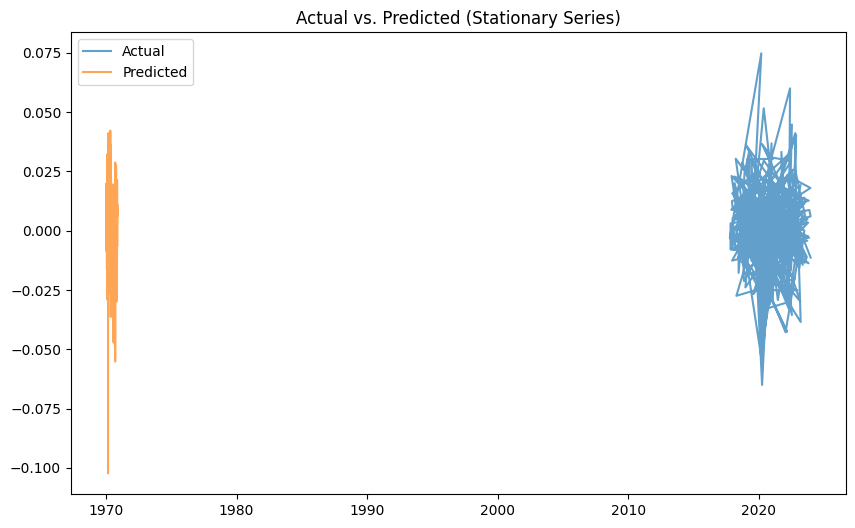

In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Build the MLP model
model = Sequential([
    Dense(64, activation='relu', input_dim=7),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)

# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title("Actual vs. Predicted (Stationary Series)")
plt.legend()
plt.show()


In [ ]:
# Standardize the data (important for MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Define the MLP model (a simple regressor)
mlp = MLPRegressor(max_iter=500, random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(50,50,50),(100,50,25),(150,100,50,25),(10,),(15,10),(5,3)],  # 1 or 2 layers, with varying neurons (50,), (100,), (150,), (100, 100),
    'activation': ['relu', 'tanh', 'logistic'],  # Activation function
    'solver': ['adam', 'lbfgs'],  # Optimizer
    'alpha': [0.0001, 0.001, 0.01, 0.015, 0.02],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Learning rate options
    'learning_rate_init': [0.001, 0.01, 0.005],  # Initial learning rate
}

# GridSearchCV with verbose output
grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get best parameters and best model
print(f"\nBest Hyperparameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on Test Set: {mse}")

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('MLP Model: Predictions vs Actual')
plt.legend()
plt.show()


Iteration 1, loss = 0.10377592
Iteration 2, loss = 0.00853687
Iteration 3, loss = 0.01828996
Iteration 4, loss = 0.00185304
Iteration 5, loss = 0.00342139
Iteration 6, loss = 0.00177760
Iteration 7, loss = 0.00069734
Iteration 8, loss = 0.00088408
Iteration 9, loss = 0.00044565
Iteration 10, loss = 0.00052435
Iteration 11, loss = 0.00040444
Iteration 12, loss = 0.00042145
Iteration 13, loss = 0.00038818
Iteration 14, loss = 0.00038570
Iteration 15, loss = 0.00037343
Iteration 16, loss = 0.00037020
Iteration 17, loss = 0.00036443
Iteration 18, loss = 0.00036068
Iteration 19, loss = 0.00035653
Iteration 20, loss = 0.00035269
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Mean Squared Error on Test Set: 0.00011568059731085939


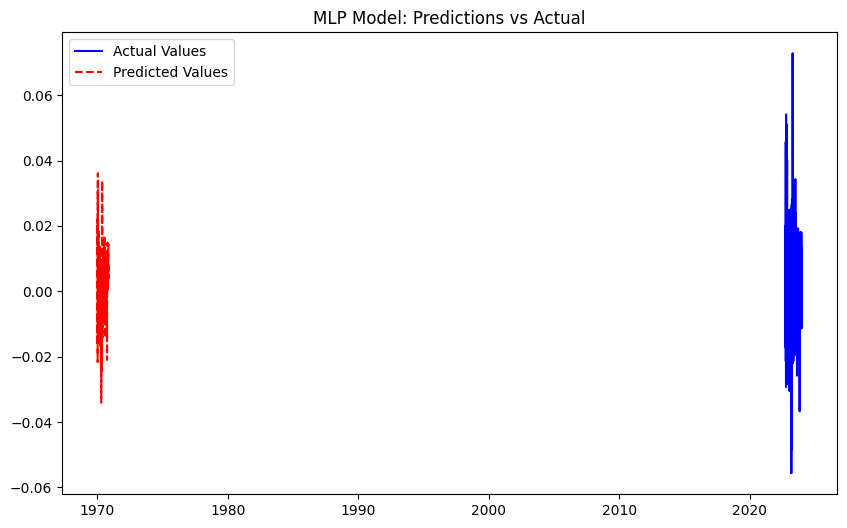

In [ ]:
# Load and preprocess data log_diff_no_outliers



# Standardize the data (important for MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Define the MLP model with the best hyperparameters
mlp = MLPRegressor(
    activation='logistic',        # Logistic activation function
    alpha=0.015,                   # Regularization term
    hidden_layer_sizes=(15, 10), # Two hidden layers, 100 neurons each
    learning_rate='constant',     # Constant learning rate
    learning_rate_init=0.01,     # Initial learning rate
    solver='adam',                # Adam optimizer
    max_iter=500,                 # Max iterations for training
    random_state=42,              # For reproducibility
    verbose=2                     # Verbose output during training
)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print MSE for evaluation
print(f"\nMean Squared Error on Test Set: {mse}")

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--')
plt.title('MLP Model: Predictions vs Actual')
plt.legend()
plt.show()


In [ ]:

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")  # Multiply by 100 to get percentage

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


# Symmetric Mean Absolute Percentage Error (sMAPE)
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_score = smape(y_test, y_pred)
print(f"Symmetric Mean Absolute Percentage Error (sMAPE): {smape_score}%")


Mean Absolute Error (MAE): 0.008079749776126929
Mean Absolute Percentage Error (MAPE): 209.38663967481955%
R-squared (R²): 0.4330023194810134
Symmetric Mean Absolute Percentage Error (sMAPE): 109.07993084324303%


## 2c

In [ ]:
# Create lagged features
def create_lagged_features(series, n_lags=5):
    data = pd.DataFrame(series, columns=["JPM"])
    for lag in range(1, n_lags + 1):
        data[f"lag_{lag}"] = series.shift(lag)
    data = data.dropna()  # Drop rows with NaN values
    return data

# Generate lagged features
n_lags = 5
data = create_lagged_features(diff_series, n_lags=n_lags)

Train test split

In [ ]:
# Split into X (predictors) and y (target)
X = data.drop(columns=["JPM"])
y = data["JPM"]

# Split into training and testing sets (chronological order)
split_idx = int(len(data) * 0.8)  # 80% train, 20% test
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


# Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1380, 5) (345, 5) (1380,) (345,)


Model and Training

In [ ]:
# Reset TensorFlow backend and set random seed for reproducibility
tf.keras.backend.clear_session()
tf.random.set_seed(1234)

# Model parameters
act_fun = "relu"
hp_units = 25
hp_units_2 = 15
hp_units_3 = 10
n_dropout = 0.2

# Build the Sequential MLP model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=hp_units, activation=act_fun, input_shape=(X_train_scaled.shape[1],)))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_2, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=hp_units_3, activation=act_fun))
model.add(tf.keras.layers.Dropout(n_dropout))
model.add(tf.keras.layers.Dense(units=1, activation="linear"))  # Linear activation for regression

# Optimizer and loss function for regression
hp_lr = 1e-5  # Learning rate
adam = tf.keras.optimizers.Adam(learning_rate=hp_lr)

model.compile(optimizer=adam, loss="mean_squared_error", metrics=["mae"])

# Early stopping callback
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    mode="min",
    verbose=1,
    patience=20,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=32,
    verbose=2,
    callbacks=[es],
)

# Predict on test data
y_pred = model.predict(X_test_scaled)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 - 2s - 51ms/step - loss: 115.1112 - mae: 10.3309 - val_loss: 198.1722 - val_mae: 13.6863
Epoch 2/1000
35/35 - 0s - 4ms/step - loss: 114.9834 - mae: 10.3248 - val_loss: 198.0291 - val_mae: 13.6814
Epoch 3/1000
35/35 - 0s - 4ms/step - loss: 115.0451 - mae: 10.3299 - val_loss: 197.8823 - val_mae: 13.6764
Epoch 4/1000
35/35 - 0s - 4ms/step - loss: 114.8554 - mae: 10.3232 - val_loss: 197.7421 - val_mae: 13.6716
Epoch 5/1000
35/35 - 0s - 4ms/step - loss: 114.8771 - mae: 10.3215 - val_loss: 197.5968 - val_mae: 13.6667
Epoch 6/1000
35/35 - 0s - 4ms/step - loss: 114.8416 - mae: 10.3203 - val_loss: 197.4497 - val_mae: 13.6617
Epoch 7/1000
35/35 - 0s - 4ms/step - loss: 114.7943 - mae: 10.3183 - val_loss: 197.3085 - val_mae: 13.6569
Epoch 8/1000
35/35 - 0s - 4ms/step - loss: 114.5188 - mae: 10.3057 - val_loss: 197.1670 - val_mae: 13.6521
Epoch 9/1000
35/35 - 0s - 4ms/step - loss: 114.6015 - mae: 10.3104 - val_loss: 197.0326 - val_mae: 13.6475
Epoch 10/1000
35/35 - 0s - 5ms/step - loss: 114.5

In [ ]:
# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"Model MSE on test data: {mse}")
print(f"Model MAE on test data: {mae}")



Model MSE on test data: 9.944298290542017
Model MAE on test data: 2.528113915757389


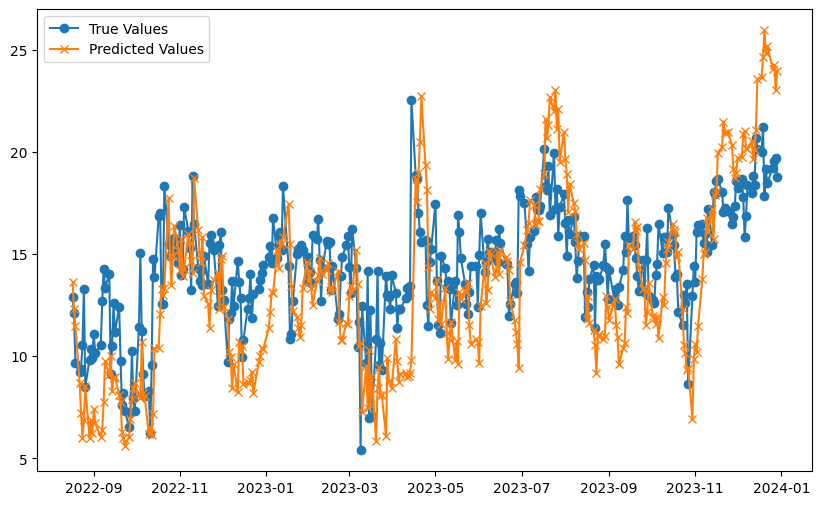

In [ ]:
# Visualize predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="True Values", marker='o')
plt.plot(y_test.index, y_pred, label="Predicted Values", marker='x')
plt.legend()
# plt.title("True vs Predicted Values")
plt.show()

## 3a

In [ ]:
df4 = df1.copy()
df4 = df4.iloc[:,0]
df4.head()

2017-01-03    69.970299
2017-01-04    70.099365
2017-01-05    69.454109
2017-01-06    69.462173
2017-01-09    69.510551
Name: JPM, dtype: float64

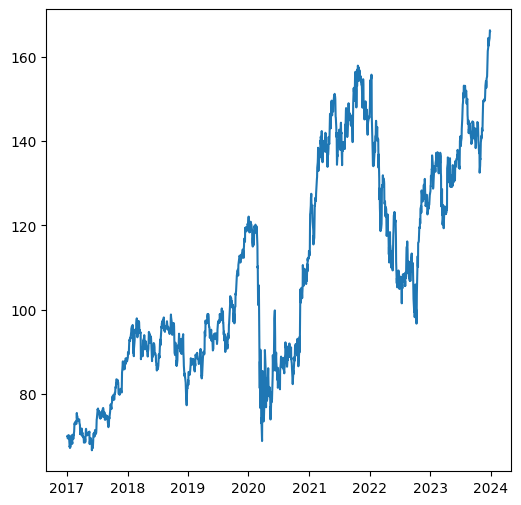

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(df4);

(1730, 30)


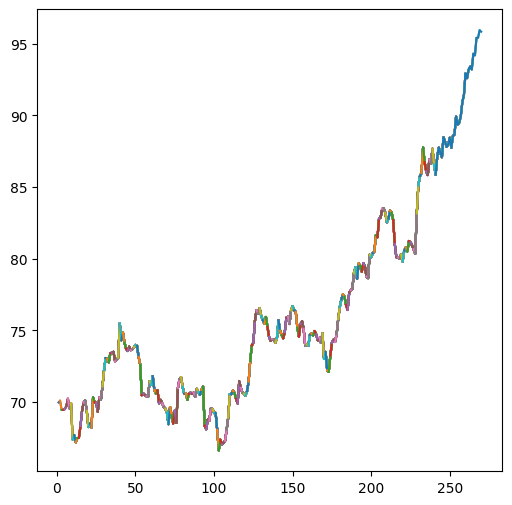

In [ ]:
#Prepare for GAF. Use window size of 30 days.
X_train = []
window_size = 30
for i in range(window_size, df4.shape[0]):
    X_train.append(df4[i - window_size : i])
X_train = np.array(X_train)
print(X_train.shape)
# Define a "window_size"-days interval
days = np.linspace(1, X_train.shape[0], num=X_train.shape[0])
# Plot the overlapping time series
plt.figure(figsize=(6, 6))
for i in range(241):
    plt.plot(days[i : window_size + i], X_train[i, :])

In [ ]:
#GAF transform
transformer = GramianAngularField()
X_train_new = transformer.transform(X_train)
print(X_train_new.shape)

(1730, 30, 30)


(30, 30)


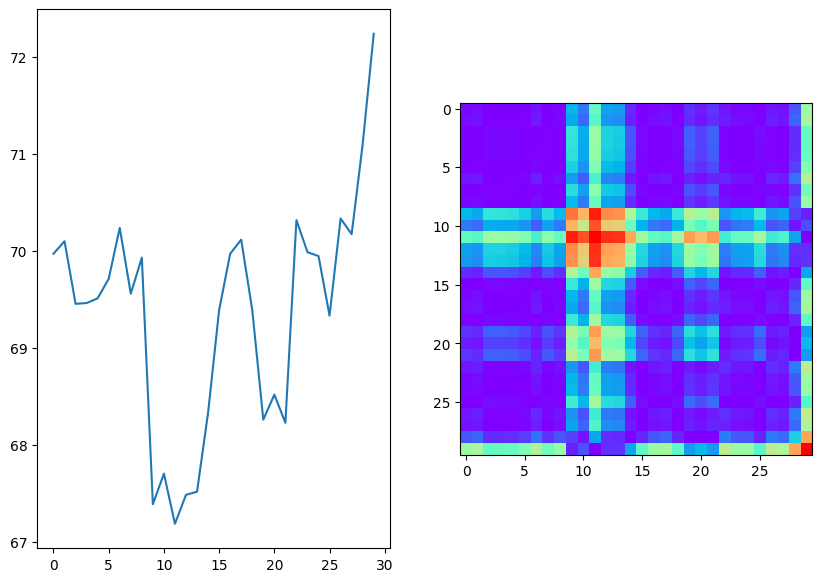

In [ ]:
# Show the results for the first time series
fig, ax = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[0, :])
ax[1].imshow(X_train_new[0], cmap="rainbow")
print(X_train_new[0].shape)

In [ ]:
# Generate the labels: 1 if price goes up after window_size days, 0 otherwise
y_data = []
for i in range(window_size, df4.shape[0] - window_size):
    y_data.append(df4[i] < df4[i + window_size])
y_data = np.array(y_data)
y_data.shape

<ipython-input-97-8f28fa3793e0>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_data.append(df4[i] < df4[i + window_size])


(1700,)

In [ ]:
# Determine the samples to be used as inputs in the model and rescale them to the [0,255] scale
X_data = X_train_new[:-window_size]
for i in range(X_data.shape[0]):
    X_data[i] = (X_data[i] - np.min(X_data[i])) / (
        np.max(X_data[i]) - np.min(X_data[i])
    )
# We could simply write X_data = (X_data + 1)/2
X_data = X_data * 255
X_data.shape

(1700, 30, 30)

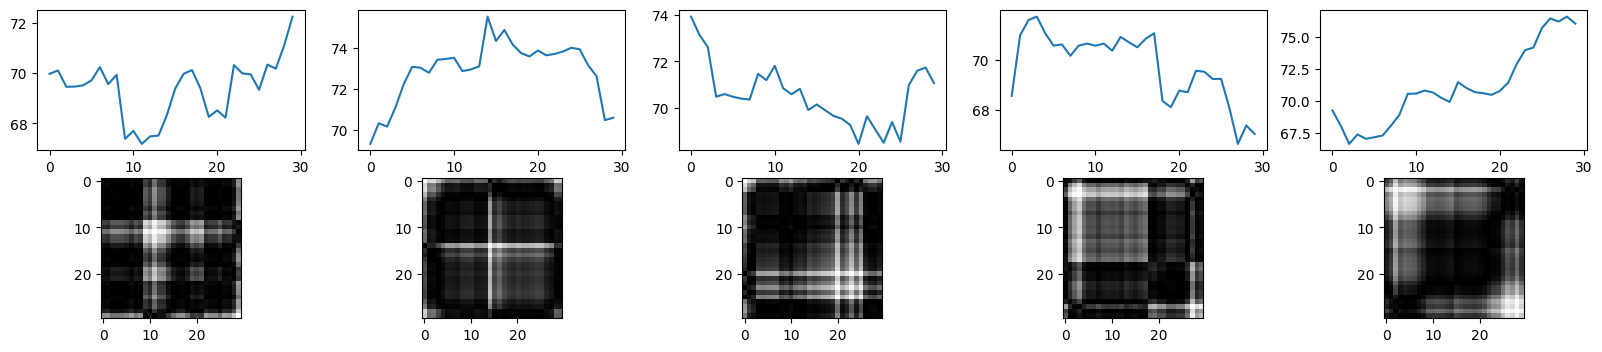

In [ ]:
# Display several time series and the corresponding images
fig, ax = plt.subplots(2, 5, figsize=(20, 4))
for i in range(0, 125, 25):
    ax[0, int(i / 25)].plot(X_train[i])
for i in range(0, 125, 25):
    ax[1, int(i / 25)].imshow(X_data[i], "gray")

In [ ]:
# Split into train and test
train_split = 0.8
y_data_train = y_data[: int(train_split * y_data.shape[0])]
y_data_test = y_data[int(train_split * y_data.shape[0]) :]
X_data_train = X_data[: int(train_split * y_data.shape[0])]
X_data_test = X_data[int(train_split * y_data.shape[0]) :]

In [ ]:
#CNN model. Parameters chosen as per lecture notes.
model = tf.keras.Sequential()
# Input layer
model.add(tf.keras.layers.InputLayer(shape=(30, 30, 1)))
model.add(tf.keras.layers.Conv2D(16, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5, seed=1234))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 287,489 (1.10 MB)

 Trainable params: 287,489 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "model.keras", monitor="val_accuracy", save_best_only=True, mode="auto"
)
class_weight = {0: 1 / (1 - np.mean(y_data_train)), 1: 1.0 / np.mean(y_data_train)}
print(class_weight)

{0: 2.419928825622776, 1: 1.7042606516290726}


In [ ]:
model.fit(
    x=X_data_train,
    y=y_data_train,
    epochs=50,
    validation_data=(X_data_test, y_data_test),
    verbose=1,
    callbacks=[checkpoint],
    class_weight=class_weight,
)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5248 - loss: 8.4474 - val_accuracy: 0.5824 - val_loss: 0.6837
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5102 - loss: 1.4907 - val_accuracy: 0.4118 - val_loss: 0.7767
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5458 - loss: 1.4296 - val_accuracy: 0.3618 - val_loss: 0.7325
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5044 - loss: 1.4065 - val_accuracy: 0.5059 - val_loss: 0.7165
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4950 - loss: 1.4420 - val_accuracy: 0.5206 - val_loss: 0.7164
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5949 - loss: 1.3386 - val_accuracy: 0.5294 - val_loss: 0.7414
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5911 - loss: 1.3569 - val_accuracy: 0.5206 - val_loss: 0.7755
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6239 - loss: 1.2694 - val_accuracy: 0.5853 - v

In [ ]:
model = tf.keras.models.load_model("model.keras")
acc = model.evaluate(x=X_data_test, y=y_data_test)
print("Accuracy over validation: {:.2f}%".format(acc[1] * 100))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6339 - loss: 1.6843
Accuracy over validation: 62.35%


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
              precision    recall  f1-score   support

       False       0.44      0.42      0.43       114
        True       0.71      0.73      0.72       226

    accuracy                           0.62       340
   macro avg       0.57      0.57      0.57       340
weighted avg       0.62      0.62      0.62       340



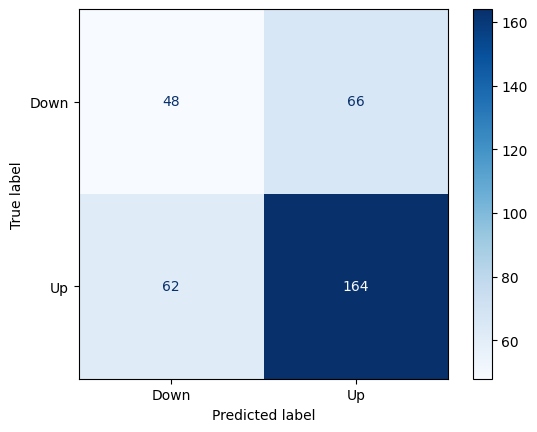

In [ ]:
#Confusion matrix
y_prob = model.predict(X_data_test)
y_pred = np.round(y_prob)
cm = metrics.confusion_matrix(y_data_test, y_pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
cm.plot(values_format="", cmap="Blues")
print(classification_report(y_data_test, y_pred))

## 3b

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 7, 7, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,841 (202.50 KB)

 Trainable params: 51,841 (202.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0343 - mae: 0.1327 - val_loss: 0.0068 - val_mae: 0.0586
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - mae: 0.0771 - val_loss: 0.0065 - val_mae: 0.0575
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - mae: 0.0720 - val_loss: 0.0063 - val_mae: 0.0567
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0109 - mae: 0.0708 - val_loss: 0.0062 - val_mae: 0.0565
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0115 - mae: 0.0708 - val_loss: 0.0062 - val_mae: 0.0565
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 - mae: 0.0785 - val_loss: 0.0063 - val_mae: 0.0573
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0116 - mae: 0.0721 - val_loss: 0.0060 - val_mae: 0.0558
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0145 - mae: 0.0751 - val_loss: 0.0060 - val_mae: 0.0556
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0121 - m

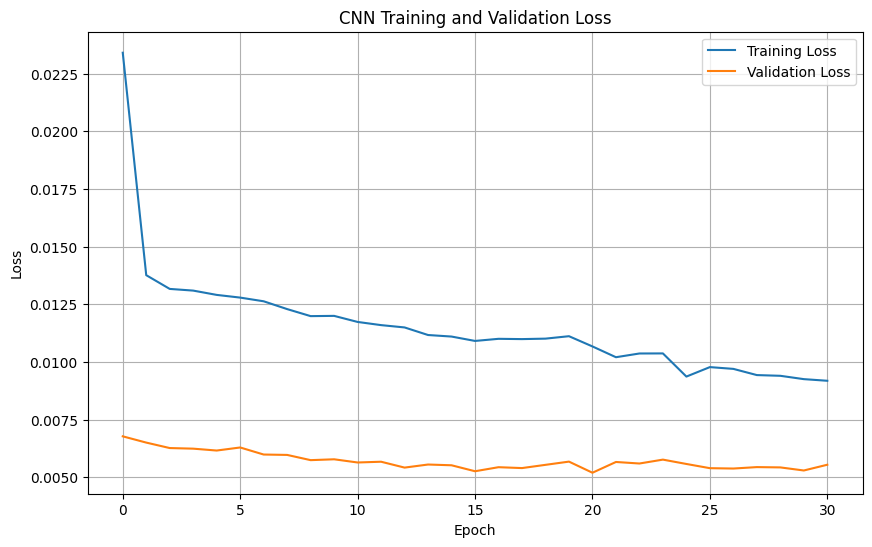

In [ ]:

# Preprocess features
features_df = X.dropna()  # Remove rows with NaN
n_timestamps = features_df.shape[1]

# Scale features and target to [-1, 1]
scaler_X = MinMaxScaler(feature_range=(-1, 1))
features_scaled = scaler_X.fit_transform(features_df)

scaler_y = MinMaxScaler(feature_range=(-1, 1))
target_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Generate Gramian Angular Field (GAF) images
gaf = GramianAngularField(image_size=n_timestamps, method='summation')
gaf_images = gaf.fit_transform(features_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    gaf_images, target_scaled, test_size=0.2, random_state=42, shuffle=False
)

# Reshape for CNN input
X_train = X_train[..., np.newaxis]  # Add channel dimension
X_test = X_test[..., np.newaxis]

# Define the CNN model
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(n_timestamps, n_timestamps, 1)),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.2),  # Add dropout for regularization
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='linear')  # Output layer for regression
])

cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Check the model summary
cnn_model.summary()

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_pred = cnn_model.predict(X_test).flatten()
y_test_unscaled = scaler_y.inverse_transform(y_test)  # Inverse scale for comparison
y_pred_unscaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
r2 = r2_score(y_test_unscaled, y_pred_unscaled)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plot loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## 3c

(1730,)


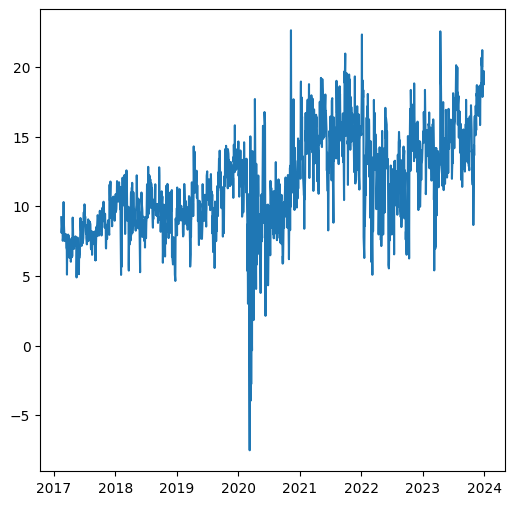

In [ ]:
Xdf = diff_series['JPM']
print(Xdf.shape)
plt.figure(figsize=(6, 6))
plt.plot(Xdf)

(1700, 30)


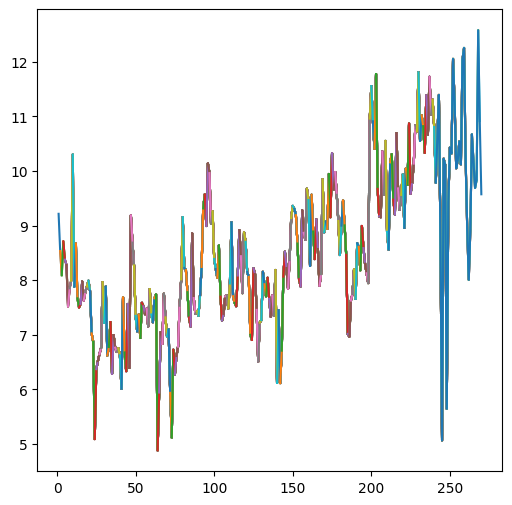

In [ ]:
X_train = []
window_size = 30
for i in range(window_size, Xdf.shape[0]):
    X_train.append(Xdf[i - window_size : i])
X_train = np.array(X_train)
print(X_train.shape)
# Define a "window_size"-days interval
days = np.linspace(1, X_train.shape[0], num=X_train.shape[0])
# Plot the overlapping time series
plt.figure(figsize=(6, 6))
for i in range(241):
    plt.plot(days[i : window_size + i], X_train[i, :])

In [ ]:
transformer = GramianAngularField()
X_train_new = transformer.transform(X_train)
print(X_train_new.shape)

(1700, 30, 30)


(30, 30)


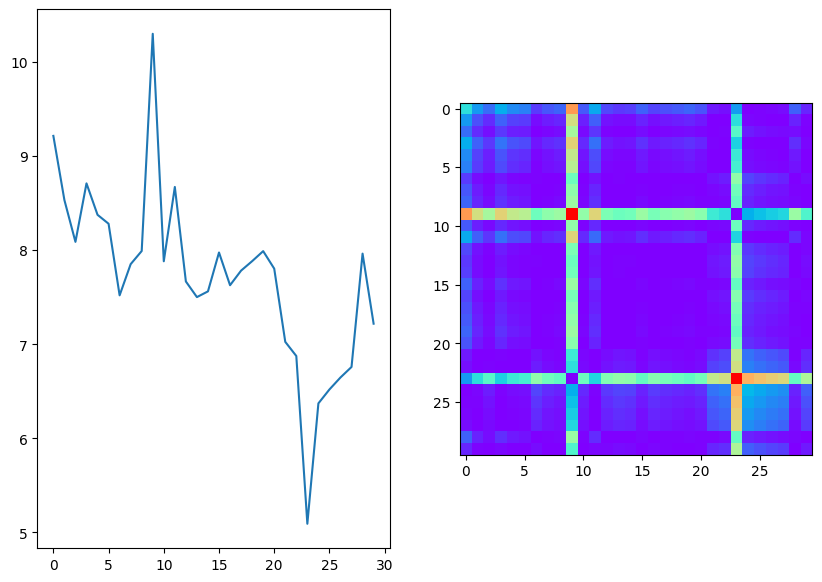

In [ ]:
# Show the results for the first time series
fig, ax = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[0, :])
ax[1].imshow(X_train_new[0], cmap="rainbow")
print(X_train_new[0].shape)

(30, 30)


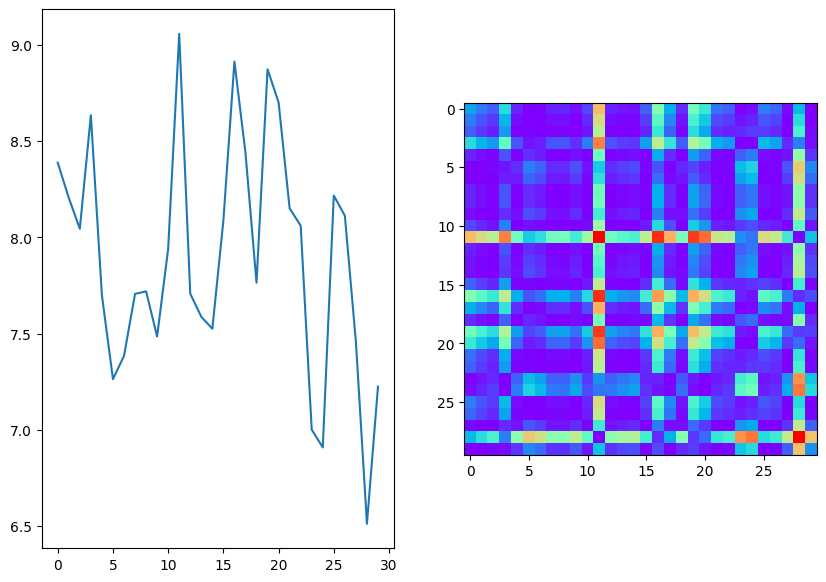

In [ ]:
# Show the results for the 100th time series
fig, ax = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(X_train[99, :])
ax[1].imshow(X_train_new[99], cmap="rainbow")
print(X_train_new[99].shape)

In [ ]:
# Generate the labels: 1 if price goes up after window_size days, 0 otherwise
y_data = []
for i in range(window_size, Xdf.shape[0] - window_size):
    y_data.append(Xdf[i] < Xdf[i + window_size])
y_data = np.array(y_data)
y_data.shape

<ipython-input-112-dbde03484177>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_data.append(Xdf[i] < Xdf[i + window_size])


(1670,)

In [ ]:
# Determine the examples to be used as inputs in the model and rescale them to the [0,255] scale
X_data = X_train_new[:-window_size]
for i in range(X_data.shape[0]):
    X_data[i] = (X_data[i] - np.min(X_data[i])) / (
        np.max(X_data[i]) - np.min(X_data[i])
    )
# We could simply write X_data = (X_data + 1)/2
X_data = X_data * 255
X_data.shape

(1670, 30, 30)

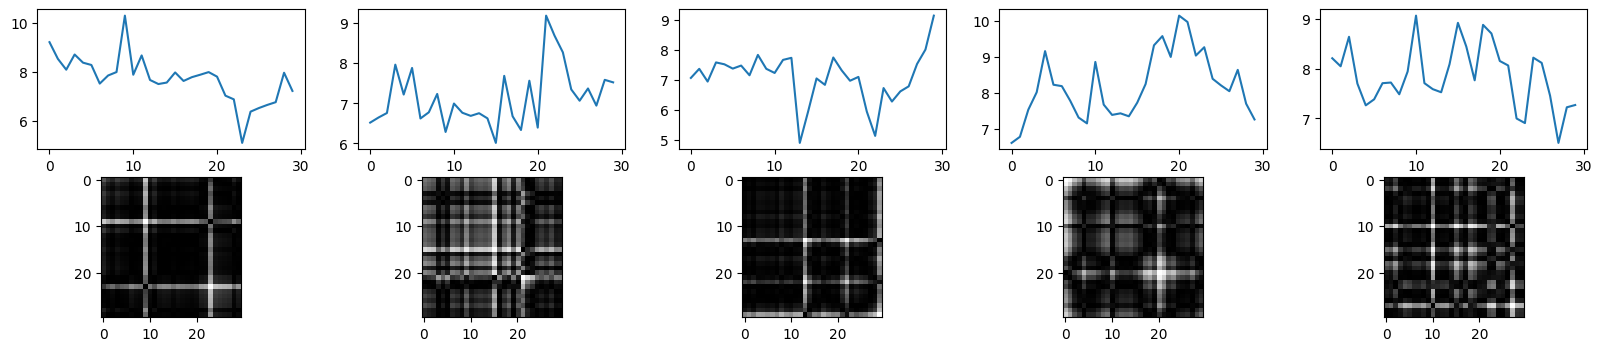

In [ ]:
# display several time series and the corresponding images
fig, ax = plt.subplots(2, 5, figsize=(20, 4))
for i in range(0, 125, 25):
    ax[0, int(i / 25)].plot(X_train[i])
for i in range(0, 125, 25):
    ax[1, int(i / 25)].imshow(X_data[i], "gray")

In [ ]:
# Split into train and test
train_split = 0.8
y_data_train = y_data[: int(train_split * y_data.shape[0])]
y_data_test = y_data[int(train_split * y_data.shape[0]) :]
X_data_train = X_data[: int(train_split * y_data.shape[0])]
X_data_test = X_data[int(train_split * y_data.shape[0]) :]

In [ ]:
model = tf.keras.Sequential()
# Input layer
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(X_train_new.shape[1], X_train_new.shape[2], 1)),
    # Conv2D(32, (2, 2), activation='relu', input_shape=(X_train_new.shape[1], X_train_new.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │          36,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,313 (177.00 KB)

 Trainable params: 45,313 (177.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
y_train.shape, X_train_new.shape

((1380,), (1700, 30, 30))

In [ ]:
model.fit(X_data, y_data , validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 152.1427 - mae: 6.9991 - val_loss: 0.5947 - val_mae: 0.5934
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.5617 - mae: 0.5464 - val_loss: 0.5700 - val_mae: 0.5787
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.5232 - mae: 0.5311 - val_loss: 0.5749 - val_mae: 0.5857
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.5190 - mae: 0.5323 - val_loss: 0.5582 - val_mae: 0.5797
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.4956 - mae: 0.5237 - val_loss: 0.5450 - val_mae: 0.5736
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4950 - mae: 0.5261 - val_loss: 0.5354 - val_mae: 0.5703
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.4904 - mae: 0.5264 - val_loss: 0.5257 - val_mae: 0.5690
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.4805 - mae: 0.5253 - val_loss: 0.5155 - val_mae: 0.5688
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.4

In [ ]:
X_test.shape, y_test.shape

((345, 5), (345,))

In [ ]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(X_data_test, y_data_test)
print(f"Test Loss (MSE): {test_loss}, Test MAE: {test_mae}")

# Predictions
y_pred = model.predict(X_data_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3622 - mae: 0.5179
Test Loss (MSE): 0.39005836844444275, Test MAE: 0.5454204082489014
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
